In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# 利用KL散度（相对熵）来衡量两个离散分布（理论分布用离散去近似）的相似性

In [101]:
import scipy.stats

def KL_divergence(p,q):
    return scipy.stats.entropy(p, q)

# 标准高斯分布的理论分布函数与经验分布函数的拟合   

In [294]:
def plot_gaussian_(mu,sigma,N):
    # 生成服从高斯分布的随机数
    X = np.random.normal(mu, sigma, size=N)
    X = sorted(X)
    min_x = X[0]
    max_x = X[-1]# 随机数的上界
    # 经验分布函数
    def F(y):
        def search(target):
            '''二分查找target的K值'''
            left = 0
            right = N-1
            while left <= right:
                mid = int((left+right)/2)
                if X[mid] > target:
                    right = mid-1
                elif X[mid]<=target: 
                    left = mid+1
            return left
        if y < min_x:
            return 0
        elif y > max_x:
            return 1
        else:
            return search(y)/N
    # 绘制[0-max_x+20]范围内的经验分布函数和理论分布函数的曲线
    x_list=np.linspace(0,max_x+20,1000)
    expe_value=np.array([F(x) for x in x_list])# 经验
    theo_value = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
            np.exp(-0.5 * (1 / sigma * (x_list - mu))**2))# 理论
    theo_value = theo_value.cumsum()
    theo_value /= theo_value[-1]
    plt.step(x_list,expe_value,label='Empirical')
    plt.step(x_list,list(reversed(expe_value)),label='Reversed emp')
    plt.plot(x_list,theo_value, 'k--', linewidth=1.5,label='Theoretical')
    # 设置
    KL=KL_divergence(expe_value,theo_value)
    # 设置
    plt.grid(True)
    plt.legend(loc='right')
    plt.title('Gasussian distribution (N={},KL={})'.format(str(N),str(KL)))
    plt.xlabel('x')
    plt.ylabel('Likelihood')

In [162]:
# def plot_gaussian(mu,sigma,N):
#     x = np.random.normal(mu, sigma, size=N)
#     # 绘制经验分布函数的直方图
#     '''
#     N: 每个bin的值
#     bins: 每个bin的x轴坐标
#     '''
#     real_value, bins, _ = plt.hist(x, N, density=True, histtype='step',
#                            cumulative=True, label='Empirical')
#     # 绘制理论分布函数
#     ## 计算概率密度函数
#     y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
#     y = y.cumsum()
#     y /= y[-1]
#     plt.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')
#     # 绘制反向的经验分布函数的直方图
#     plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
#             label='Reversed emp.')
#     # 计算理论和实际值的KL散度
#     real_value=np.concatenate([[real_value[0]],real_value])# 实际值的shape小了1
#     KL=KL_divergence(real_value,y)
#     # 设置
#     plt.grid(True)
#     plt.legend(loc='right')
#     plt.title('Gasussian distribution (N={},KL={})'.format(str(N),str(KL)))
#     plt.xlabel('x')
#     plt.ylabel('Likelihood')

Text(0.5, 0.98, 'Gaussian distribution')

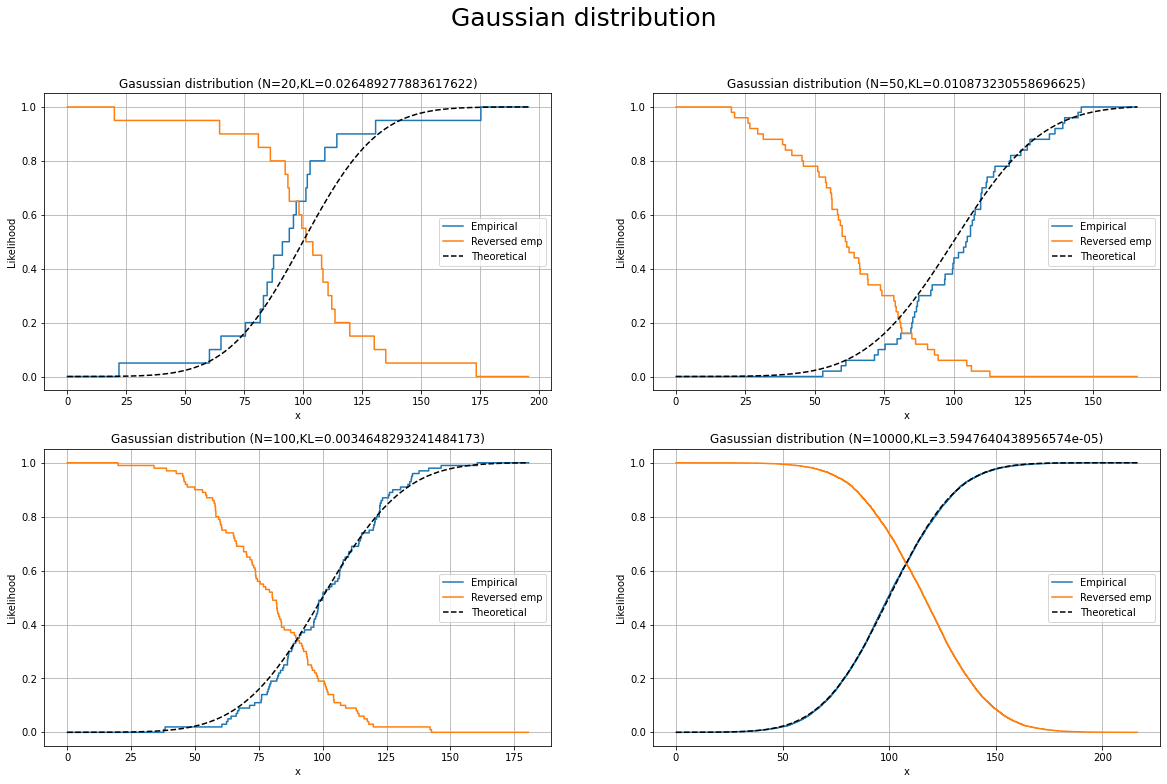

In [322]:
# 从标准高斯分布中随机抽N个样本(生成N个随机数)
mu = 100
sigma = 25

plt.figure(figsize=[20,12])
plt.subplot(2,2,1)
plot_gaussian_(mu,sigma,N=20)
# --------------------------------------------
plt.subplot(2,2,2)
plot_gaussian_(mu,sigma,N=50)
# --------------------------------------------
plt.subplot(2,2,3)
plot_gaussian_(mu,sigma,N=100)
# --------------------------------------------
plt.subplot(2,2,4)
plot_gaussian_(mu,sigma,N=10000)

plt.suptitle('Gaussian distribution',fontsize=25)

# 指数分布的理论分布函数与经验分布函数的拟合   

In [301]:
import math

def plot_exp_(scale,N):
    # 生成服从高斯分布的随机数
    #X = np.random.normal(mu, sigma, size=N)
    X = np.random.exponential(scale=scale, size=N)
    X = sorted(X)
    min_x = X[0]
    max_x = X[-1]# 随机数的上界
    # 经验分布函数
    def F(y):
        def search(target):
            '''二分查找target的K值'''
            left = 0
            right = N-1
            while left <= right:
                mid = int((left+right)/2)
                if X[mid] > target:
                    right = mid-1
                elif X[mid]<=target: 
                    left = mid+1
            return left
        if y < min_x:
            return 0
        elif y > max_x:
            return 1
        else:
            return search(y)/N
    # 绘制[0-max_x+20]范围内的经验分布函数和理论分布函数的曲线
    x_list=np.linspace(0,max_x+20,1000)
    expe_value=np.array([F(x) for x in x_list])# 经验
    # 理论
    r=1/scale
    theo_value = r*math.e**(-r*x_list)
    theo_value = theo_value.cumsum()
    theo_value /= theo_value[-1]
    plt.step(x_list,expe_value,label='Empirical')
    plt.step(x_list,list(reversed(expe_value)),label='Reversed emp')
    plt.plot(x_list,theo_value, 'k--', linewidth=1.5,label='Theoretical')
    # 设置
    KL=KL_divergence(expe_value,theo_value)
    # 设置
    plt.grid(True)
    plt.legend(loc='right')
    plt.title('exponential distribution (N={},KL={})'.format(str(N),str(KL)))
    plt.xlabel('x')
    plt.ylabel('Likelihood')

Text(0.5, 0.98, 'exponential distribution')

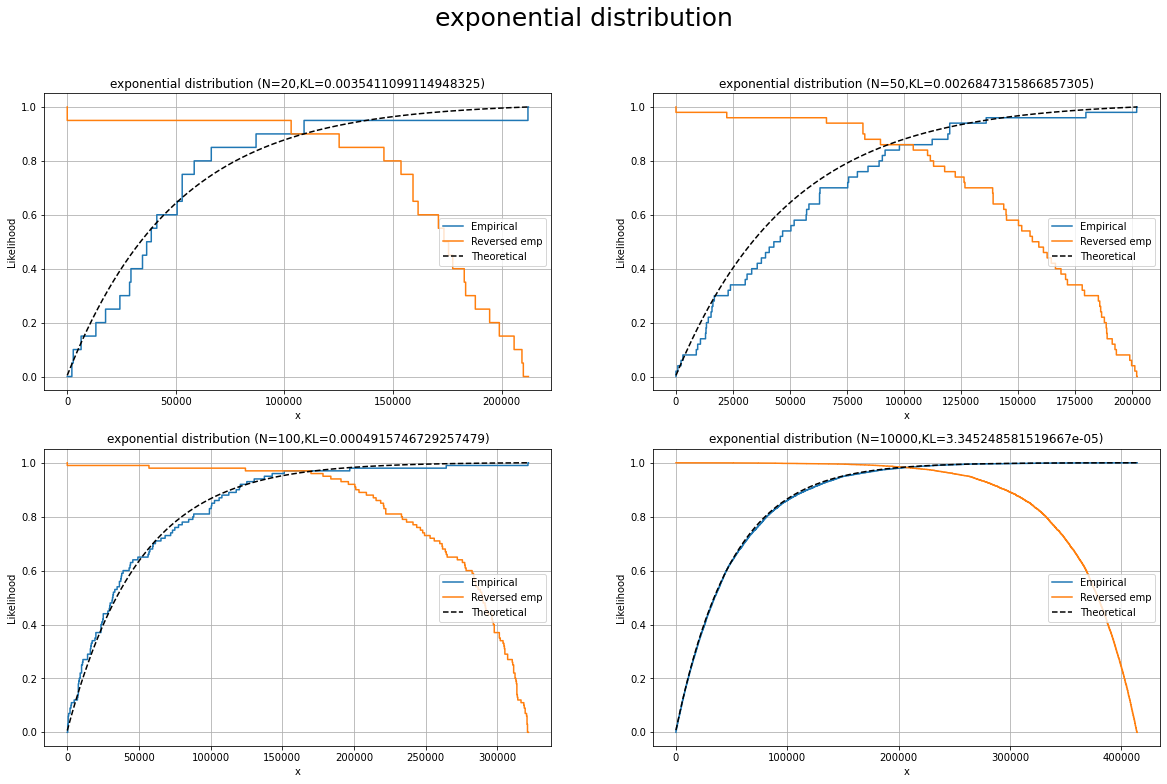

In [321]:
scale=50000

plt.figure(figsize=[20,12])
plt.subplot(2,2,1)
plot_exp_(scale,N=20)
# --------------------------------------------
plt.subplot(2,2,2)
plot_exp_(scale,N=50)
# --------------------------------------------
plt.subplot(2,2,3)
plot_exp_(scale,N=100)
# --------------------------------------------
plt.subplot(2,2,4)
plot_exp_(scale,N=10000)

plt.suptitle('exponential distribution',fontsize=25)

In [154]:
# import math

# def plot_exp(scale,N):
#     x = np.random.exponential(scale=scale, size=N)
#     # 绘制经验分布函数的直方图
#     '''
#     N: 每个bin的值
#     bins: 每个bin的x轴坐标
#     '''
#     real_value, bins, _ = plt.hist(x, N, density=True, histtype='step',
#                            cumulative=True, label='Empirical')
#     # 绘制理论分布函数
#     ## 计算概率密度函数
#     r=1/scale
#     y=r*math.e**(-r*bins)
#     y = y.cumsum()
#     y /= y[-1]
#     plt.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')
#     # 绘制反向的经验分布函数的直方图
#     plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
#             label='Reversed emp.')
#     # 计算理论和实际值的KL散度
#     real_value=np.concatenate([[real_value[0]],real_value])# 实际值的shape小了1
#     KL=KL_divergence(real_value,y)
#     # 设置
#     plt.grid(True)
#     plt.legend(loc='right')
#     plt.title('Gasussian distribution (N={},KL={})'.format(str(N),str(KL)))
#     plt.xlabel('x')
#     plt.ylabel('Likelihood')

In [308]:
# # 从标准高斯分布中随机抽N个样本(生成N个随机数)
# scale=50000


# plt.figure(figsize=[20,12])
# plt.subplot(2,2,1)
# plot_exp(scale,N=20)
# # --------------------------------------------
# plt.subplot(2,2,2)
# plot_exp(scale,N=50)
# # --------------------------------------------
# plt.subplot(2,2,3)
# plot_exp(scale,N=100)
# # --------------------------------------------
# plt.subplot(2,2,4)
# plot_exp(scale,N=1000)

# plt.suptitle('Gaussian distribution',fontsize=25)

# 均匀分布的理论分布函数与经验分布函数的拟合   

In [315]:
import math

def plot_uniform_(a,b,N):
    # 生成服从高斯分布的随机数
    #X = np.random.normal(mu, sigma, size=N)
    X = np.random.uniform(a,b,size=N)
    X = sorted(X)
    min_x = X[0]
    max_x = X[-1]# 随机数的上界
    # 经验分布函数
    def F(y):
        def search(target):
            '''二分查找target的K值'''
            left = 0
            right = N-1
            while left <= right:
                mid = int((left+right)/2)
                if X[mid] > target:
                    right = mid-1
                elif X[mid]<=target: 
                    left = mid+1
            return left
        if y < min_x:
            return 0
        elif y > max_x:
            return 1
        else:
            return search(y)/N
    # 绘制[0-max_x+20]范围内的经验分布函数和理论分布函数的曲线
    x_list=np.linspace(0,max_x+20,1000)
    expe_value=np.array([F(x) for x in x_list])# 经验
    # 理论
    theo_value = np.array([1/(b-a) if (x > a and x < b) else 0 for x in x_list])
    theo_value = theo_value.cumsum()
    theo_value /= theo_value[-1]
    plt.step(x_list,expe_value,label='Empirical')
    plt.step(x_list,list(reversed(expe_value)),label='Reversed emp')
    plt.plot(x_list,theo_value, 'k--', linewidth=1.5,label='Theoretical')
    # 设置
    KL=KL_divergence(expe_value,theo_value)
    # 设置
    plt.grid(True)
    plt.legend(loc='right')
    plt.title('uniform distribution (N={},KL={})'.format(str(N),str(KL)))
    plt.xlabel('x')
    plt.ylabel('Likelihood')

Text(0.5, 0.98, 'uniform distribution')

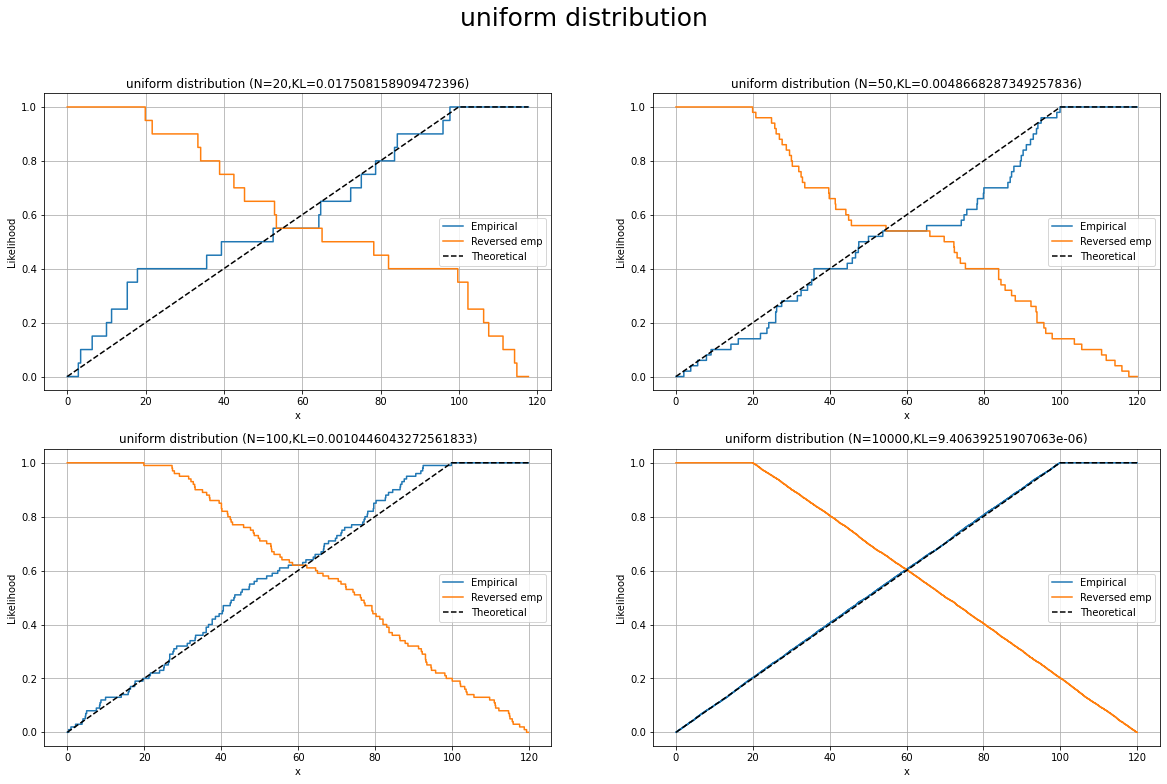

In [324]:
a,b=0,100

plt.figure(figsize=[20,12])
plt.subplot(2,2,1)
plot_uniform_(a,b,N=20)
# --------------------------------------------
plt.subplot(2,2,2)
plot_uniform_(a,b,N=50)
# --------------------------------------------
plt.subplot(2,2,3)
plot_uniform_(a,b,N=100)
# --------------------------------------------
plt.subplot(2,2,4)
plot_uniform_(a,b,N=10000)

plt.suptitle('uniform distribution',fontsize=25)